## Análise Exploratória das Paralimpíadas 2024 
Uma breve análise do quadro de medalhas dos Jogos Paralímpicos de Paris 2024.
## Objetivo
O objetivo dessa análise é responder a seguinte questão: **a maneira usada para ranquear os países nas paralimpíadas, usando apenas os ouros ou o total de medalhas, é eficaz?**


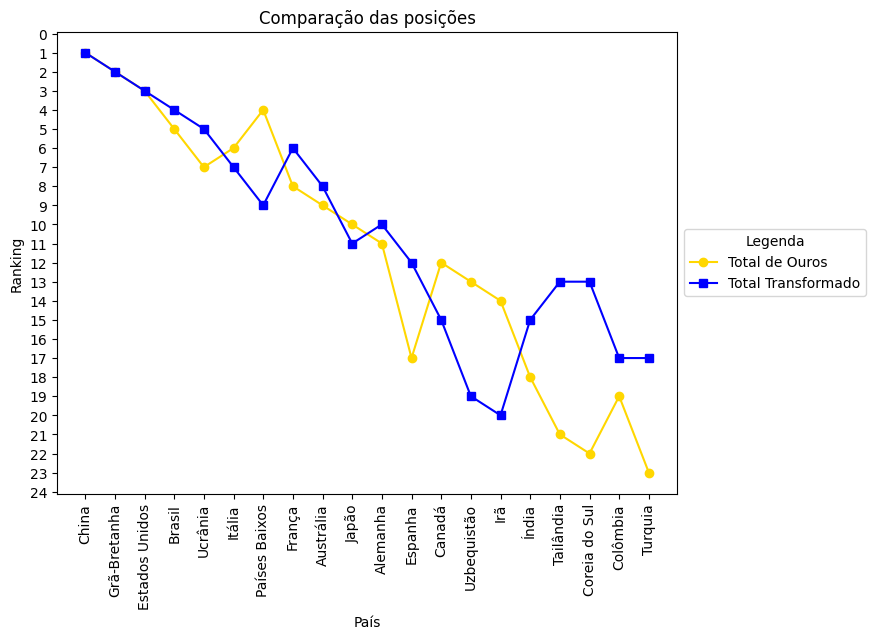

In [ ]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.ticker import MultipleLocator 

#TRANSFORMACOES E CALCULOS COM OS DADOS DE INTERESSE

#abrindo a tabela do excel
dados=pd.read_excel('paralimpiadas.xlsx')
dados.head()

#transformando algumas colunas em lista
ouro=dados['Medalha de ouro'].tolist()
prata=dados['Medalha de prata'].tolist()
bronze=dados['Medalha de bronze'].tolist()

#criando listas para as transformações
L_prata_ouro=[]
L_bronze_ouro=[]

#transformando prata em ouro, arredondando os valores e adicionando na lista
for item in prata:
     prata_ouro=item/2.5
     arredonda=round(prata_ouro, 2)
     L_prata_ouro.append(arredonda)

#transformando bronze em ouro, arredondando os valores e adicionando na lista
for item in bronze:
     bronze_ouro=item/5
     arredonda2=round(bronze_ouro, 2)
     L_bronze_ouro.append(arredonda2)

#criando um DataFrame para somar as duas listas
df=pd.DataFrame(zip(L_bronze_ouro, L_prata_ouro),
                       columns=['bronze_ouro', 'prata_ouro'])

df['total']=df['bronze_ouro']+df['prata_ouro']

#transforma a coluna recém-criada "total" em lista 
total=df['total'].tolist()

#transforma a lista "total" em uma coluna da tabela "dados" e soma a nova coluna com "Medalha de ouro"
dados['total']=total
dados['total de Ouros']=dados['Medalha de ouro'] + dados['total']

#ordena os valores da coluna "total de Ouros" para verificar a ordem dos países em relação a quantos ouros transformados ganharam
dados = dados.sort_values(by='total de Ouros', ascending=False)

dados.head(10)

#CRIANDO GRAFICO

#transformando algumas colunas em lista
paises = dados['País\xa0\xa0\xa0'].tolist()
ranking_ouros = dados['Ordem por ouros\xa0'].tolist()
ranking_total = dados['Ordem por total'].tolist()

#criando area de plotagem
fig, ax = plt.subplots(figsize = (8, 6))

#definindo os valores a serem representados nas linhas
ax.plot(paises[:20], ranking_ouros[:20], marker='o', color='gold', label='Total de Ouros')
ax.plot(paises[:20], ranking_total[:20], marker='s', color='blue', label='Total Transformado')

#invertendo os numeros do eixo y para comecar no 1, visto que está se trabalhando com posicoes em um ranking
ax.invert_yaxis()

#definindo o quadrante do grafico
ax.yaxis.set_tick_params(which='major', labelright=False, labelleft=True)

#definindo os nomes dos eixos x e y, respectivamente
ax.set_xlabel('País')
ax.set_ylabel('Ranking')

#definindo o titulo
ax.set_title('Comparação das posições')

# dividindo os espacos do eixo y de 1 em 1 unidade
ax.yaxis.set_major_locator(MultipleLocator(1))

#invertendo a posicao dos nomes dos paises e predefinindo a quantidade de paises representados
ax.set_xticks(range(len(paises[:20])))
ax.set_xticklabels(paises[:20], rotation=90)

#legenda
dado_leg = ['Total de Ouros', 'Total Transformado']

ax.legend(title = 'Legenda',
          loc = 'center left',
          bbox_to_anchor =(1, 0.5))

plt.show()
